<a href="https://colab.research.google.com/github/keirkwame/axionEmu/blob/main/Open_access_version_of_4e5_Planck_2018_3x2pt_analysis_(ma%3D_29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as sps
import getdist
from tqdm import trange

# checking that we are using a GPU
device = 'gpu:0' if tf.test.is_gpu_available() else 'cpu'
print('using', device, 'device \n')


/home/ian/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
using gpu:0 device 



In [2]:
import affine

In [3]:
import axionEmu

In [4]:
from axionEmu.cosmopower.cosmopower_NN import cosmopower_NN

In [5]:
from axionEmu.cosmopower.cosmopower_PCAplusNN import cosmopower_PCAplusNN

In [6]:
##DM-like axions (m > 5.e-27 eV)

tt_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TT_cp_NN_5e5_DM_t2' #TT_lensed_NL_NN_axion'
                               )

te_emu_model_ax = cosmopower_PCAplusNN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TE_cp_PCAplusNN_5e5_DM_t2' #TE_lensed_NL_NN_axion'
                               )

ee_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/EE_cp_NN_5e5_DM_t2' #EE_lensed_NL_NN_axion'
                                )

In [7]:
##DE-like axions (m < 5.e-27 eV)

tt_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TT_cp_NN_5e5_DE_t2'
                               )

te_emu_model_ax = cosmopower_PCAplusNN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TE_cp_PCAplusNN_5e5_DE_t2'
                               )

ee_emu_model_ax = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/EE_cp_NN_5e5_DE_t2'
                                )

In [8]:
##m = 1e-25 axion
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/home/keir/Software/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_cdm':    [0.0003, 0.149, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          'omega_ax': [1e-32, 0.149,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'],
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
fixed = {'log10ma': 7.0}

# instantiation
tf_planck_ax = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
                                  fix_parameters = fixed,
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax,
                                  tt_emu_model=tt_emu_model_ax,
                                  te_emu_model=te_emu_model_ax)
# tf_planck_2e4 = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
#                                   fix_parameters = dict(),
#                                   tf_planck2018_lite_path=tf_planck2018_lite_path,
#                                   ee_emu_model=ee_emu_model_2e4,
#                                   tt_emu_model=tt_emu_model_2e4,
#                                   te_emu_model=te_emu_model_2e4)

In [9]:
tt_emu_model_ax.modes

array([2.000e+00, 3.000e+00, 4.000e+00, ..., 5.998e+03, 5.999e+03,
       6.000e+03])

In [10]:
##m = 1e-25 axion
FIDUCIAL = np.reshape(np.array([ 0.022242,  0.1197,  0.673,  0.055,  0.9658,  3.0753,  0.05, 1.0080]).astype('float32'), (1, 8))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,  1E-2, 1E-4]).astype('float32'), (1,8))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [11]:
##m = 1e-28 axion
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/home/keir/Software/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_lamda':    [0.16, 0.36, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          #'log10ma': [2.9, 3.1, 'uniform'], #10^32ma(ma in unit of eV)
                          'omega_ax': [1e-32, 0.01,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'],
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
fixed = {'log10ma': 4.0}
# instantiation
tf_planck_ax = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
                                  fix_parameters = fixed,
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax,
                                  tt_emu_model=tt_emu_model_ax,
                                  te_emu_model=te_emu_model_ax)
# tf_planck_2e4 = tf_planck2018_lite(parameters=parameters_and_priors_ax, 
#                                   fix_parameters = dict(),
#                                   tf_planck2018_lite_path=tf_planck2018_lite_path,
#                                   ee_emu_model=ee_emu_model_2e4,
#                                   tt_emu_model=tt_emu_model_2e4,
#                                   te_emu_model=te_emu_model_2e4)

In [12]:
##m = 1e-28 axion
FIDUCIAL = np.reshape(np.array([ 0.022242,  0.3107,  0.673,  0.1,  0.9658,  3.0753,  0.005, 1.0080]).astype('float32'), (1, 8))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-3,     1E-2,   1E-3,   1E-3,    1E-3,  1E-3, 1E-4]).astype('float32'), (1,8))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [13]:
#Planck TTTEEE likelihood
@tf.function
def log_prob_ax(theta):
    return tf.squeeze(tf_planck_ax.posterior(theta), -1)


In [19]:
log_prob_ax(current_state_ax[0][0])

ValueError: in user code:

    File "<ipython-input-13-c2c39d4f9da0>", line 4, in log_prob_ax  *
        return tf.squeeze(tf_planck_ax.posterior(theta), -1)
    File "/home/ian/axionEmu/tf_planck2018_lite_mod.py", line 387, in posterior  *
        pr = tf.reshape(self.priors.prob(params), [params.shape[0], 1])

    ValueError: Cannot reshape a tensor with 1 elements to shape [8,1] (8 elements) for '{{node Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](Blockwise/prob/JointDistributionSequential/prob/Exp, Reshape/shape)' with input shapes: [], [2] and with input tensors computed as partial shapes: input[1] = [8,1].


In [20]:
# number of parameters
n_params_ax = len(parameters_and_priors_ax)

# number of walkers (note you'll end up with a total of 2*n_walkers for this parallel variant of the affine sampler)
n_walkers = 50

# initialize walkers and current state
walkers1_ax = tf.random.normal([n_walkers, n_params_ax], FIDUCIAL, EPSILON)
walkers2_ax = tf.random.normal([n_walkers, n_params_ax], FIDUCIAL, EPSILON)
current_state_ax = [walkers1_ax, walkers2_ax]

In [21]:
# number of MCMC steps to take (you'll end up with an MCMC chain with shape (n_steps, 2*n_walkers, n_parameters))
n_steps = 50000

# run the sampler
with tf.device(device):
    chain_ax = affine.affine_sample(log_prob_ax, n_steps, current_state_ax, args=[])

  0%|          | 164/49999 [00:02<10:49, 76.78it/s]


KeyboardInterrupt: 

In [12]:
burnin_steps = 200
samples_ax = chain_ax.numpy()[burnin_steps:,:,:].reshape((-1, n_params_ax)) #.numpy() #n_params_ax


In [13]:
import emcee
auto = []
for i in np.linspace(100, 15500, 155):
  auto_time = np.mean(emcee.autocorr.integrated_time(chain_ax.numpy()[:int(i)], tol=0))
  auto.append(auto_time)

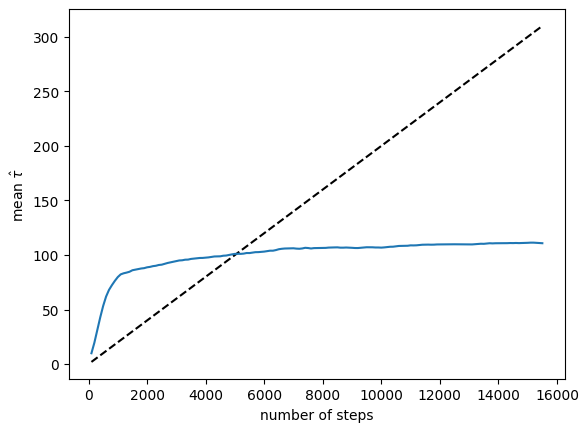

In [14]:
import matplotlib.pyplot as plt
n = np.linspace(100, 15500, 155)
y = auto
plt.plot(n, n / 50.0, "--k")
plt.plot(n, y)
# plt.xlim(0, n.max())
# plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$")
plt.show()

In [15]:
##m = 1e-25 axion
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{cdm}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         #r"log 10^{32} ma",
         r"\omega_{\mathrm{ax}}",
         r"A_{planck}"]
labels = names
# mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in


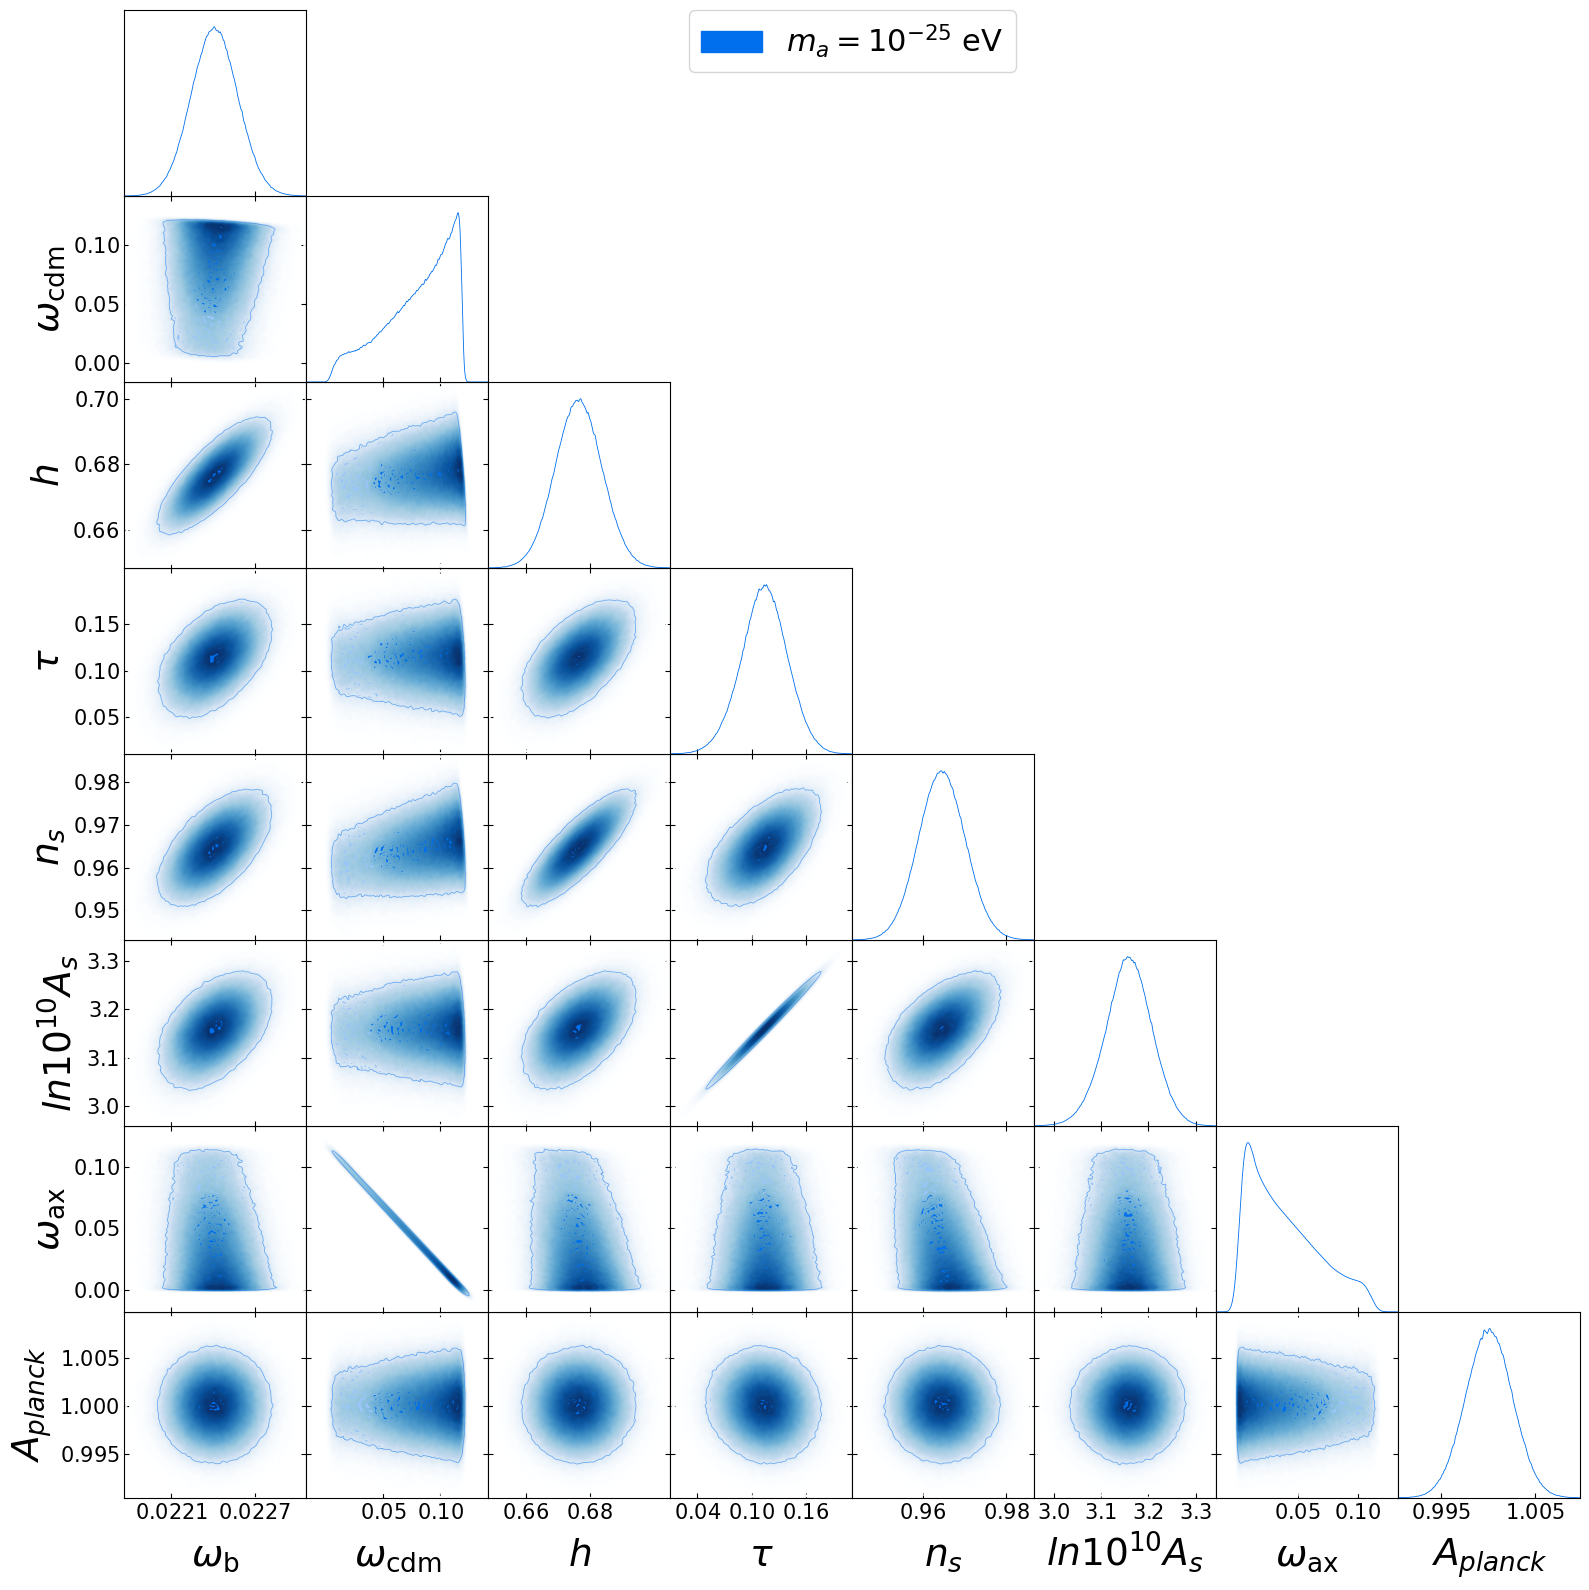

In [18]:
##m = 1e-25 axion
mcsamples_ax.updateSettings({'contours': [0.68, 0.95, 0.99]})
g.triangle_plot([mcsamples_ax], filled=True, shaded=True,legend_labels=[r'$m_a = 10^{-25}$ eV'])
plt.savefig('../planck_results_fixed_mass.png')
plt.show()